In [ ]:
!pip install geopandas
!pip install contextily

In [ ]:
import geopandas
import pandas as pd
import contextily

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
comuni = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Com01012021_g")
comuni.head()

COD_RIP  ...                                           geometry
0        1  ...  POLYGON ((404703.558 5026682.655, 405359.554 5...
1        1  ...  POLYGON ((380700.909 4977305.520, 381105.998 4...
2        1  ...  POLYGON ((364710.857 5022090.678, 364737.794 5...
3        1  ...  POLYGON ((415942.504 5033304.609, 416079.315 5...
4        1  ...  POLYGON ((376934.962 4999073.854, 376960.555 4...

[5 rows x 13 columns]

In [ ]:
province = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/ProvCM01012021_g")
province.head()

COD_RIP  ...                                           geometry
0        1  ...  POLYGON ((411015.006 5049970.983, 411266.039 5...
1        1  ...  POLYGON ((438328.612 5087208.215, 439028.888 5...
2        1  ...  POLYGON ((460929.542 5076320.298, 461165.259 5...
3        1  ...  MULTIPOLYGON (((378673.492 4958865.159, 378928...
4        1  ...  POLYGON ((425041.329 4997628.309, 424948.989 4...

[5 rows x 13 columns]

In [ ]:
parchiz = geopandas.read_file("/content/drive/MyDrive/Parchi_regionali_e_nazionali_polygon.zip")
parchiz.head()

FID  ...                                           geometry
0    5  ...  POLYGON ((587577.037 5107497.548, 587615.036 5...
1    6  ...  POLYGON ((586196.195 5100871.221, 586351.566 5...
2    7  ...  POLYGON ((486537.216 5078441.081, 486530.341 5...
3    8  ...  POLYGON ((617860.123 5053114.432, 617863.431 5...
4    1  ...  POLYGON ((584084.298 5161019.100, 583763.056 5...

[5 rows x 11 columns]

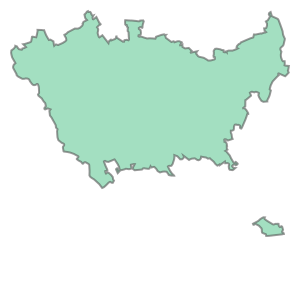

In [ ]:
prov_mi = province[province['SIGLA'] == 'MI'].geometry.squeeze()
prov_mi

In [ ]:
com_mi = comuni[comuni.within(prov_mi)]
com_mi.head()

COD_RIP  ...                                           geometry
1811        1  ...  POLYGON ((493446.898 5029705.643, 493602.897 5...
1812        1  ...  POLYGON ((495595.883 5032525.624, 495661.881 5...
1813        1  ...  POLYGON ((488023.938 5045041.530, 488050.939 5...
1814        1  ...  POLYGON ((506416.116 5045124.529, 506782.458 5...
1815        1  ...  POLYGON ((496562.280 5041533.478, 496401.277 5...

[5 rows x 13 columns]

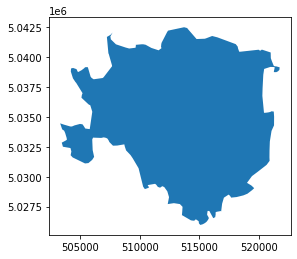

In [ ]:
MI = comuni[comuni["COMUNE"] == "Milano"]
MI.plot()

In [ ]:
parchi_mi = parchiz[parchiz.intersects(MI.geometry.squeeze())]
parchi_mi

FID  ...                                           geometry
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...

[2 rows x 11 columns]

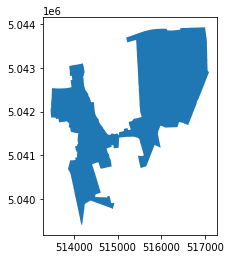

In [ ]:
parco_nord = parchi_mi[parchi_mi.NOME == 	"Parco Nord Milano"]
parco_nord.plot()

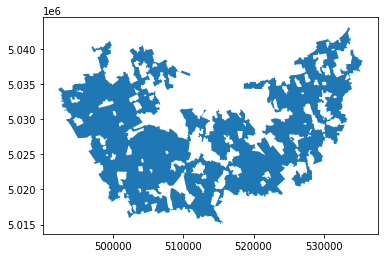

In [ ]:
parco_sud = parchi_mi[parchi_mi.NOME == "Parco Sud Milano"]
parco_sud.plot()

In [ ]:
parchi_fin = comuni[comuni.intersects(parco_nord) | comuni.intersects(parco_sud)]
parchi_fin 

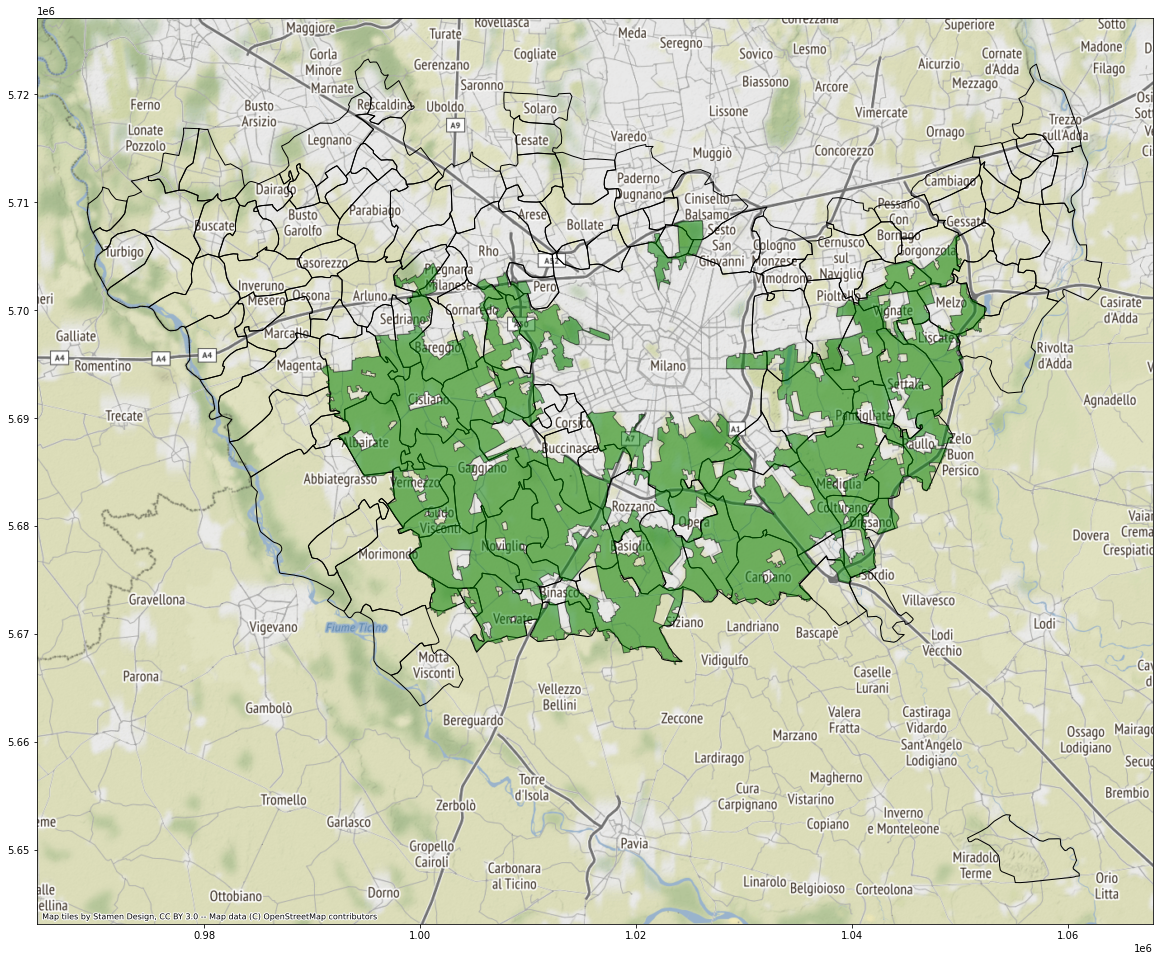

In [ ]:
ax = com_mi.to_crs(epsg=3857).plot(figsize =(20,20), facecolor="none", edgecolor = "k")
parchi_mi.to_crs(epsg=3857).plot(ax=ax, figsize =(20,20), facecolor="green", edgecolor = "k", alpha = 0.5)
contextily.add_basemap(ax, crs=3857)

In [ ]:
quartieri = geopandas.read_file("/content/drive/MyDrive/ds964_nil_wm (1).zip").to_crs(parchi_mi.crs)
quartieri.head()

ID_NIL  ...                                           geometry
0      48  ...  POLYGON ((512062.065 5031592.500, 512060.090 5...
1      64  ...  POLYGON ((508300.627 5037409.029, 508044.992 5...
2      67  ...  POLYGON ((512218.673 5037159.040, 512287.357 5...
3      81  ...  POLYGON ((513122.815 5040992.086, 513032.293 5...
4      84  ...  POLYGON ((515648.965 5041679.723, 515660.224 5...

[5 rows x 9 columns]

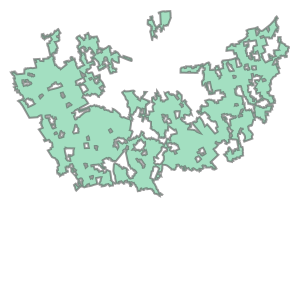

In [ ]:
parchi_mi.unary_union

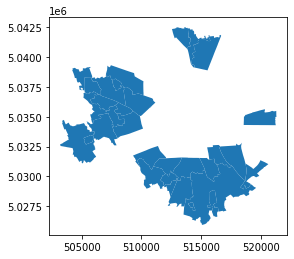

In [ ]:
quartieri_p = quartieri[quartieri.intersects(parchi_mi.unary_union)]
quartieri_p.plot()

Inserire il nome di un parco: Parco Alpi Orobie Valtellinesi


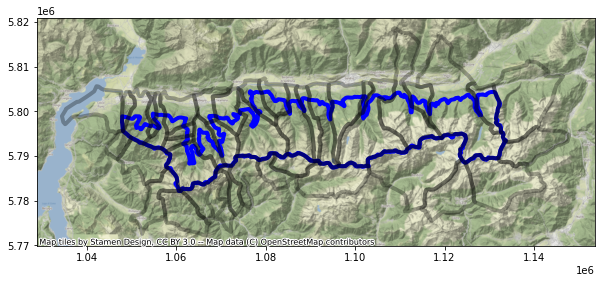

In [ ]:
nomeParco = input("Inserire il nome di un parco: ")
parco = parchiz[parchiz["NOME"] == nomeParco]
parcoSqueeze = parco.geometry.squeeze()

comParco =  comuni[comuni.intersects(parcoSqueeze)]
comParco

ax = parco.to_crs(epsg = 3857).plot(figsize=(10,10), facecolor = "none", edgecolor = "b", linewidth = 4)
comParco.to_crs(epsg = 3857).plot(ax = ax, facecolor = "none",linewidth=4, alpha = 0.3, edgecolor = "k" )
contextily.add_basemap(ax=ax)

Inserisci il nome di un parco: Parco Nord Milano


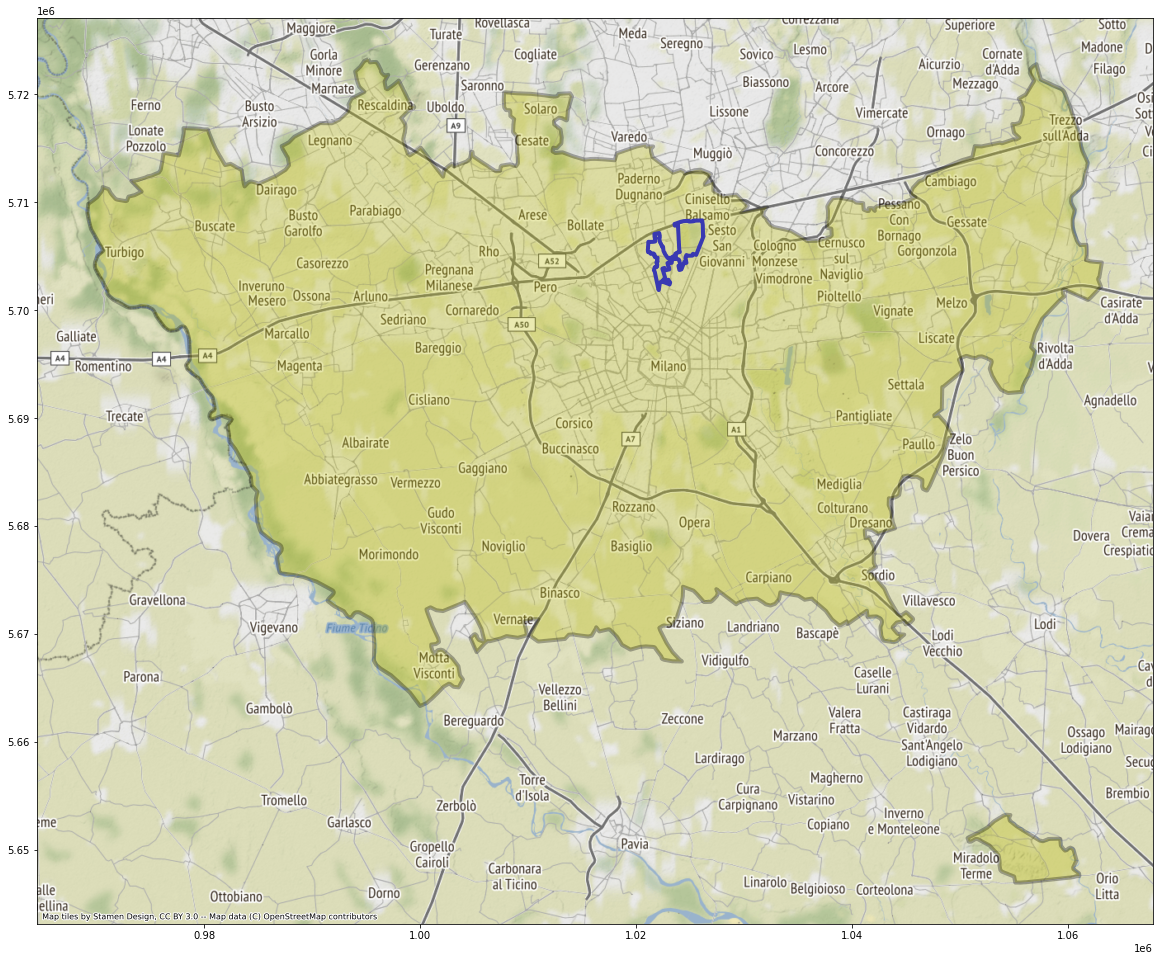

In [ ]:
nomeParco = input("Inserisci il nome di un parco: ")
parco = parchiz[parchiz["NOME"] == nomeParco]
parcoSqueeze = parco.geometry.squeeze()

provinceParco =  province[province.intersects(parcoSqueeze)]
provinceParco

ax = parco.to_crs(epsg = 3857).plot(figsize=(20,20), facecolor = "none", edgecolor = "b", linewidth = 4)
provinceParco.to_crs(epsg = 3857).plot(ax = ax, facecolor = "y",linewidth=4, alpha = 0.3, edgecolor = "k" )
contextily.add_basemap(ax=ax)

In [ ]:
nome_comune = input("Inserisci il nome di un comune: ")
comune = comuni[comuni["COMUNE"] == nome_comune]
comSqueeze = comune.geometry.squeeze()

parchiCom =  parchiz[parchiz.intersects(comSqueeze)]
parchiCom

print("i parchi ospitati all'interno di questo comune sono: \n", parchiCom.NOME)

ax = comune.to_crs(epsg = 3857).plot(figsize=(20,20), facecolor = "none", edgecolor = "b", linewidth = 4)
parchiCom.to_crs(epsg = 3857).plot(ax = ax, facecolor = "y",linewidth=4, alpha = 0.3, edgecolor = "k" )
contextily.add_basemap(ax=ax)